<a href="https://colab.research.google.com/github/saishshinde15/NLP/blob/main/text_classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [141]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

File ‘AirlineTweets.csv’ already there; not retrieving.



In [142]:
dataset=pd.read_csv('AirlineTweets.csv')

In [143]:
dataset

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [144]:
dataset.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [145]:
X=dataset['text']

In [146]:
X

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [147]:
y=dataset['airline_sentiment'].values

In [148]:
y

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [166]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)


In [167]:
y

array([1, 2, 1, ..., 1, 0, 1])

In [168]:
from sklearn.model_selection import train_test_split
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [169]:
len(X_train_input)

11712

In [170]:
len(y_train)

11712

In [171]:
vectorizer=TfidfVectorizer(max_features=2000)

In [172]:
X_train=vectorizer.fit_transform(X_train_input)
X_test=vectorizer.transform(X_test_input)

In [173]:
X_train=X_train.toarray()  # data must not be sparse matrix before passing into tensorflow
X_test=X_test.toarray()     # this is the additionl step in using deep learning

In [ ]:
# input dimensions
D = X_train.shape[1]

In [174]:
import tensorflow as tf

In [175]:
ann=tf.keras.models.Sequential()

In [176]:
ann.add(tf.keras.layers.Dense(units=2000,activation='relu')) # here we took 2000 as dimension of X_train(columns in X_train) is 2000,we can start from 100 and compare it with 2000

In [177]:
ann.add(tf.keras.layers.Dropout(rate=0.5))

In [178]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [179]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [180]:
from tensorflow.keras.callbacks import EarlyStopping


In [181]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [182]:
history=ann.fit(X_train,y_train,batch_size=128,epochs=40,validation_data=(X_test,y_test),callbacks=[early_stopping]). ## not getting a great loss,make changes accordingly

Epoch 1/40
92/92 [==============================] - 21s 217ms/step - loss: 0.1257 - accuracy: 0.6339 - val_loss: -0.4693 - val_accuracy: 0.6387
Epoch 2/40
92/92 [==============================] - 21s 234ms/step - loss: -1.9092 - accuracy: 0.6342 - val_loss: -2.3035 - val_accuracy: 0.5806
Epoch 3/40
92/92 [==============================] - 18s 202ms/step - loss: -5.7390 - accuracy: 0.6351 - val_loss: -5.6887 - val_accuracy: 0.6018
Epoch 4/40
92/92 [==============================] - 19s 203ms/step - loss: -11.9056 - accuracy: 0.6349 - val_loss: -10.6677 - val_accuracy: 0.5970
Epoch 5/40
92/92 [==============================] - 21s 233ms/step - loss: -20.6461 - accuracy: 0.6356 - val_loss: -17.1179 - val_accuracy: 0.6011
Epoch 6/40
92/92 [==============================] - 19s 208ms/step - loss: -31.7667 - accuracy: 0.6360 - val_loss: -25.0956 - val_accuracy: 0.6001
Epoch 7/40
92/92 [==============================] - 18s 199ms/step - loss: -45.0709 - accuracy: 0.6342 - val_loss: -34.6795 -

In [183]:
ann.evaluate(X_test,y_test)

92/92 [==============================] - 2s 21ms/step - loss: -943.4713 - accuracy: 0.5905


[-943.4713134765625, 0.5905054807662964]

In [184]:
ann.evaluate(X_train,y_train)

366/366 [==============================] - 11s 31ms/step - loss: -1487.8376 - accuracy: 0.6401


[-1487.837646484375, 0.6401126980781555]

<Axes: >

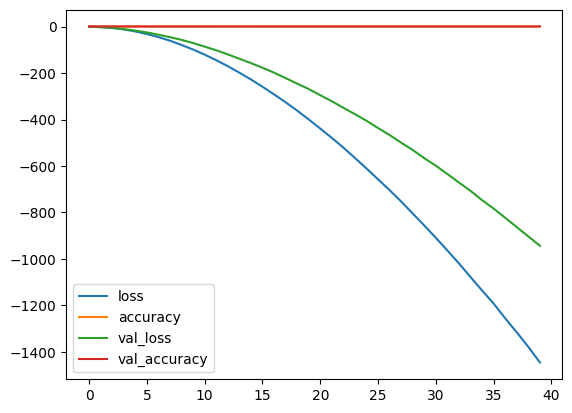

In [186]:
pd.DataFrame(history.history).plot()

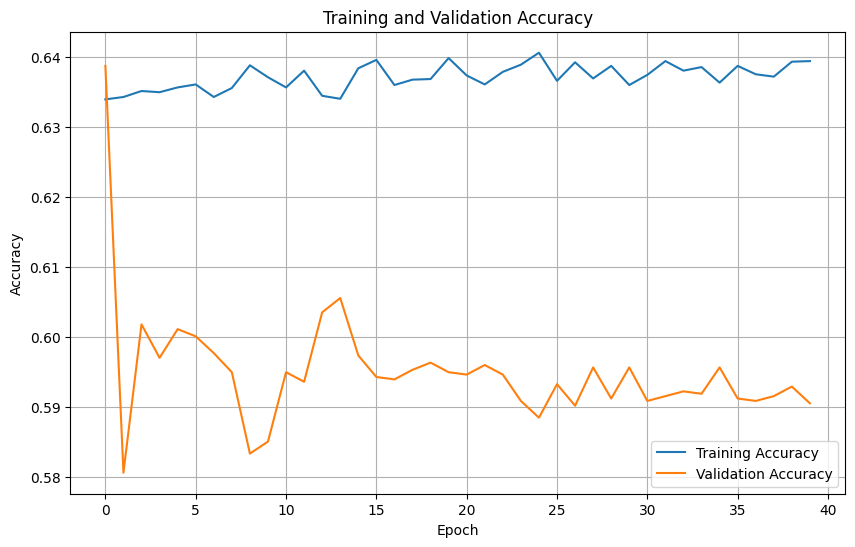

In [188]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

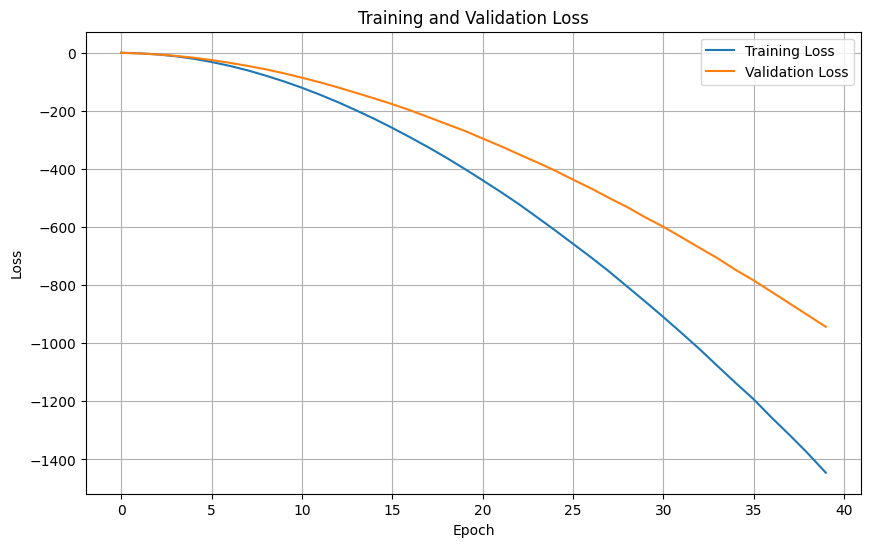

In [189]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [199]:
y_pred=ann.predict(X_test)

92/92 [==============================] - 5s 57ms/step


In [203]:
y_pred = y_pred > 0.5 #to print false / true , if to print numerical 0/1 skip this step

In [204]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [205]:

from sklearn.metrics import confusion_matrix


In [206]:
cm = confusion_matrix(y_test,y_pred, normalize='true')
cm

array([[0.66042781, 0.33957219, 0.        ],
       [0.19543974, 0.80456026, 0.        ],
       [0.03153153, 0.96846847, 0.        ]])

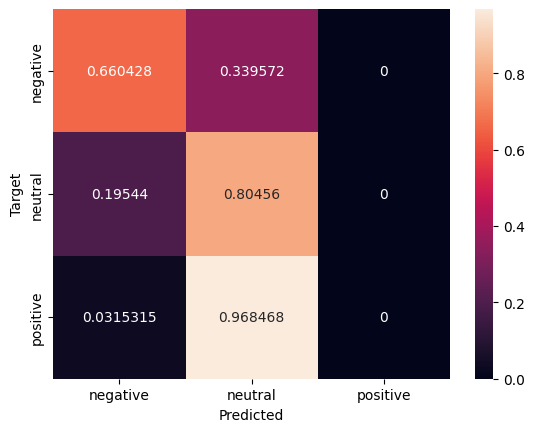

In [208]:
def plot_cm(cm):
  classes = ['negative', 'neutral','positive'] #according to index values
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [209]:


from sklearn.metrics import classification_report

y_pred = y_pred > 0.5 #to print false / true , if to print numerical 0/1 skip this step

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1870
           1       0.32      0.80      0.45       614
           2       0.00      0.00      0.00       444

    accuracy                           0.59      2928
   macro avg       0.41      0.49      0.41      2928
weighted avg       0.64      0.59      0.58      2928



In [211]:
ann.layers

In [216]:
ann.layers[0].get_weights()

[array([[ 0.44465733,  0.46338663,  0.5176125 , ...,  0.5521644 ,
          0.4993422 ,  0.5733481 ],
        [-0.11066534,  0.02166188,  0.02565798, ..., -0.05639688,
         -0.03128227, -0.14106657],
        [ 0.25869146,  0.3609681 ,  0.33012536, ...,  0.36267588,
          0.425692  ,  0.36338666],
        ...,
        [ 0.18960267,  0.23404185,  0.17929086, ...,  0.19693998,
          0.3767396 ,  0.28505367],
        [-0.00470105,  0.00503363,  0.03971627, ...,  0.02224357,
          0.02542781,  0.06940836],
        [ 0.5345096 ,  0.6927379 ,  0.5387529 , ...,  0.6456326 ,
          0.5825594 ,  0.61943626]], dtype=float32),
 array([0.7335262, 0.7361592, 0.7350976, ..., 0.7371908, 0.7130185,
        0.7352287], dtype=float32)]

In [219]:
w = ann.layers[0].get_weights()[0]

In [220]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'jetblue': 986,
 'yes': 1989,
 'catering': 333,
 'just': 994,
 'got': 829,
 'here': 885,
 'and': 144,
 'now': 1240,
 'they': 1748,
 'are': 174,
 'but': 301,
 'very': 1878,
 'frustrated': 786,
 'was': 1899,
 'supposed': 1701,
 'to': 1777,
 'be': 241,
 'there': 1746,
 'by': 304,
 '10': 2,
 '30': 36,
 'united': 1846,
 'have': 863,
 'amp': 142,
 're': 1436,
 'when': 1933,
 'it': 976,
 'would': 1974,
 'come': 398,
 'this': 1754,
 'has': 859,
 'never': 1215,
 'happened': 853,
 'on': 1261,
 'any': 155,
 'airline': 114,
 'my': 1202,
 'first': 719,
 'time': 1771,
 'with': 1951,
 'disappointed': 545,
 'wife': 1942,
 'two': 1828,
 'new': 1217,
 'stuck': 1684,
 'in': 943,
 'dc': 491,
 'until': 1852,
 'monday': 1184,
 'no': 1225,
 'bags': 229,
 'why': 1941,
 'do': 559,
 'still': 1673,
 'not': 1232,
 'arrived': 180,
 'website': 1914,
 'says': 1541,
 'at': 194,
 'the': 1742,
 'airport': 117,
 'hours': 910,
 'late': 1025,
 'flightr': 739,
 'nothappy': 1234,
 'americanair': 138,
 'dfwairport': 531,
 '

In [230]:
threshold = 2

print("Most positive words:")
word_weight_tuples = []
for word, index in word_index_map.items():
    weight = w[index, 0]
    if weight > threshold:
        word_weight_tuples.append((word, weight))



Most positive words:


In [229]:
print("Most negative words:")
word_weight_tuples = []
for word, index in word_index_map.items():
    weight = w[index, 0]
    if weight < -threshold:
        word_weight_tuples.append((word, weight))



Most negative words:
